<a href="https://colab.research.google.com/github/Blaizzy/Cancer_classifier/blob/Blaizzy-beta/BreastCancer(Sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Access my drive files 

In [1]:
from google.colab import drive
from google.colab import files

#Accessing my google drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [3]:
import os
#Change dir to the file dir
os.chdir('/content/drive/My Drive/Colab Notebooks/python files/Blog/')
# dataset
#This is a special Class that I created optimized for this dataset 
from Data import Dataset 
# uncomment this line to get full documentation
print(Dataset.__doc__)

This class is created and optimized by Prince Canuma for the  Wisconsin Breast Cancer Database (January 8, 1991)
    citation:
     K. P. Bennett & O. L. Mangasarian: "Robust linear programming
     discrimination of two linearly inseparable sets", Optimization Methods
    and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers
    ---------------- Methods ---------------------
    load(): Gets the text in the .txt file, creates a pandas Dataframe,
    copies it to the class variable df and returns DataFrame.

    ---------------- Class Methods----------------------
    scatterplot(): create a scatter plot with showing correlation and histogram of all columns

    df_scatter():


    


#   Details about Dataset:
    Attributes 2 through 10 have been used to represent instances.
    Each instance has one of 2 possible classes: benign or malignant.

        1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of
          pattern separation for medical diagnosis applied to breast cytology. In
          -- Size of data set: only 369 instances (at that point in time)
          -- Collected classification results: 1 trial only
      
             -- Accuracy on remaining 50% of dataset: 93.5%
   
             -- Accuracy on remaining 33% of dataset: 95.9%
         
    
    Number of Attributes: 10 plus the class attribute
    
    Attribute Information: (class attribute has been moved to last column)
    
       #  Attribute                     Domain
       -- -----------------------------------------
       1. Sample code number            id number
       2. Clump Thickness               1 - 10
       3. Uniformity of Cell Size       1 - 10
       4. Uniformity of Cell Shape      1 - 10
       5. Marginal Adhesion             1 - 10
       6. Single Epithelial Cell Size   1 - 10
       7. Bare Nuclei                   1 - 10
       8. Bland Chromatin               1 - 10
       9. Normal Nucleoli               1 - 10
      10. Mitoses                       1 - 10
      11. Class:                        (2 for benign, 4 for malignant)
      
       **Total**:   699 points (as of the donated datbase on 15 July 1992)
    
    Missing attribute values: 16
    
       There are 16 instances in Groups 1 to 6 that contain a single missing 
       (i.e., unavailable) attribute value, now denoted by "?".  
    
    Class distribution:
     
       Benign: 458 (65.5%)
       Malignant: 241 (34.5%)


# Get Files and read it into a Pandas Data Frame

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/python files/Blog/cancer dataset'

In [5]:
# Using my Class Dataset
    # 1. Pass the Path of where your .txt file containing the dataset is located.
    # 2. Use .load() function to load read and create a Dataframe 
    # and returned it to the variable data.
# Note: My class copies your DataFrame, so in case you mess up you can always
# have a backup of you Data. Just type in:
    # Dataset.df
# I also do the preprocessing and cleaning for you inside the Load function
# I found and filled missing values with the standard deviation.
data = Dataset(path)
data = data.load()

File opened successfully!!!
Standard deviation: 4.0 
Mean: 3.0

-------------------statistical details---------------

       Bare Nuclei Bland Chromatin Clump Thickness Marginal Adhesion Mitoses  \
count          698             698             698               698     698   
unique          11              10              10                10       9   
top              1               2               1                 1       1   
freq           402             166             144               406     578   

       Normal Nucleoli Single Epithelial Cell Size Uniformity of Cell Shape  \
count              698                         698                      698   
unique              10                          10                       10   
top                  1                           2                        1   
freq               442                         385                      352   

       Uniformity of Cell Size    y  
count                      698  698  
unique  

# Visualization
Save the Dataframe as CSV so we can see it on excel

In [0]:
# Using pandas .to_csv function
data.to_csv(path_or_buf='/content/drive/My Drive/Colab Notebooks/python files/Blog/cancer_dataset.csv', 
            sep=',', encoding='utf-8')

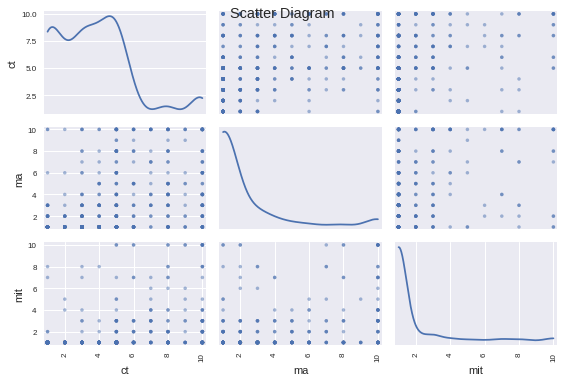

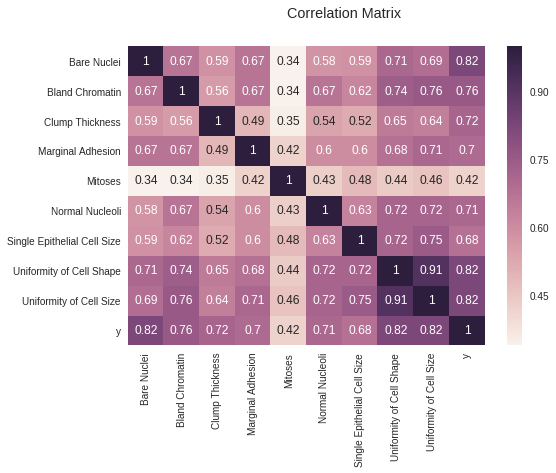

In [7]:
# Now we create a scatter diagram and a correlation matrix
# of all atributes to see their relation

scatter = Dataset.scatter_plot()
corr = Dataset.correlation_matrix()

# Data Preparation for Training
In this step we need to separate our label from  other atributes because the model reads them separately .

    *Separating the Label into a 1D vector and tranforming it into 0s and 1s.

    *Separating the Features.
    

In [8]:
# labels

y = data['y']

y = pd.get_dummies(y, drop_first=False)
print('----------One hot encoded labels----------\n')
print(y.head())
print('---------------')

# Features
x = data[['Clump Thickness', 'Uniformity of Cell Size',
              'Uniformity of Cell Shape', 'Marginal Adhesion',
              'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
              'Normal Nucleoli', 'Mitoses']]
# Split our training Data and testing data
# we separete 50% of our 699 rows for testing 
# and 50% for training

X_train, X_test, y_train, y_test = train_test_split(x, y['4'], test_size=0.5, random_state=101)

# Check mean to see if they are nicely distributed
print('Training set mean',y_train.mean())
print('Test set mean:',y_test.mean())

----------One hot encoded labels----------

         2  4
1000025  1  0
1002945  1  0
1015425  1  0
1016277  1  0
1017023  1  0
---------------
Training set mean 0.3209169054441261
Test set mean: 0.36962750716332377


# Training
We can see from the data that this a Classification problem, where we are trying to predict two distinct labels (Y)  can  from our features (X).

Given our features X we want to know if the cancer is  **Benign** or **Malignant** 
(0 or 1).

In [9]:
#Creating a classifier
clf = LogisticRegression()
# Traning a testing Accuracy
model = clf.fit(X_train, y_train.values.ravel())
acc = clf.score(X_train, y_train.values.ravel())
print('Model Accuracy: ', round(acc*100,3),'%')

Model Accuracy:  97.135 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# **Testing **
Here we test how accurate our model is given new features X without the labels.


In [10]:
# Testing our classifier on our Test set
pred = clf.predict(X_test)
# Accuracy
# and a detailed Classification report
acctest = clf.score(X_test,y_test)
print('Model test Accuracy: ', round(accuracy_score(y_test,pred)*100,3), '%')
print(classification_report(y_test, pred))

# Now using a class method I created you reverse the One-hot enconding 
# into Readable and understandable Diagnostics
decode = Dataset.decode_preds(pred)

# Here we take our Predictions and Probability and create a EXCEL spreadsheet
#of our features X , our Diagnostic and Probability Distribuition
label = pd.DataFrame({'Diagnostic': decode}, index=X_test.index)
prob= pd.DataFrame(clf.predict_proba(X_test), columns=['Probabilty(Benign)','Probability(Malignant)'], index=X_test.index)
result = X_test.join(label)
result = result.join(prob['Probabilty(Benign)'])
result.to_csv(path_or_buf='/content/drive/My Drive/Colab Notebooks/python files/Blog/result_cancer_dataset.csv',
                  sep=',', encoding='utf-8')

Model test Accuracy:  95.702 %
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       220
           1       0.94      0.95      0.94       129

   micro avg       0.96      0.96      0.96       349
   macro avg       0.95      0.95      0.95       349
weighted avg       0.96      0.96      0.96       349

Classes Decoded succefully
['Benign' 'Benign' 'Malignant' 'Benign' 'Malignant']


# Visualizing and understanding our models Accuracy
-  Confusion matrix will help us see how many samples we are misclassifying

There is room for improvement. 
I will iteratively improve this algorithm till 99%, so follow my Github profile to be updated.

Confusion matrix, without normalization
[[212   8]
 [  7 122]]
Normalized confusion matrix
[[0.96 0.04]
 [0.05 0.95]]


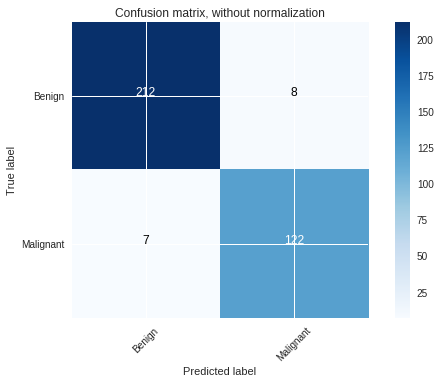

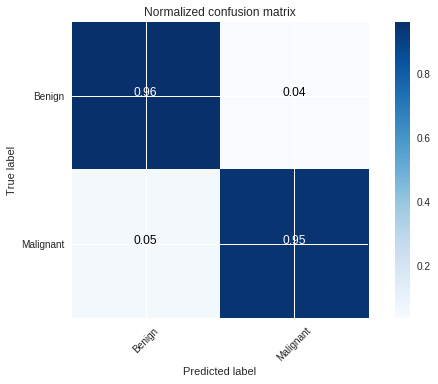

In [11]:
   # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)

    classes = ['Benign', 'Malignant']

    # Plot non-normalized confusion matrix
    plt.figure()
    Dataset.plot_confusion_matrix(cnf_matrix, classes=classes,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    Dataset.plot_confusion_matrix(cnf_matrix, classes= classes, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()



# Saving our model for future use

In [12]:
from joblib import dump
dump(clf, '/content/drive/My Drive/Colab Notebooks/python files/Blog/WiscosinBreastCancerClf.joblib') 

['/content/drive/My Drive/Colab Notebooks/python files/Blog/WiscosinBreastCancerClf.joblib']